In [1]:
import os
import sys
import numpy as np
sys.path.insert(0, os.path.abspath('..'))
sys.path.insert(0, os.path.abspath('../algorithms'))
sys.path.insert(0, os.path.abspath('../scoring'))

from scores import cross_validation_score
from algorithms import decisiontree
from decisiontree import TreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scores import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Decision-Tree classifier for UCI mushroom repository

In [2]:
mushroom_uci_data = np.genfromtxt('../pre-processed-uci-mushroom-dataset/standardized_mushroom_data.csv', delimiter=",")
mushroom_uci_target = np.genfromtxt('../pre-processed-uci-mushroom-dataset/standardized_mushroom_target.csv', delimiter=",")

## Split the UCI data into testing and training data 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(mushroom_uci_data, mushroom_uci_target, random_state=1000, test_size=250, train_size=750)

## Accuracy score for TreeClassifier on UCI mushroom repository

In [4]:
tc = TreeClassifier()
tc.fit(X_train, y_train)
print(tc.score(X_test, y_test))

0.98


## Representation of tree for model trained on uci-mushroom data-set

In [5]:
tc.print_tree()

_ Col 7 < 0.048112522432468816
__ Col 19 < 0.10585122480499262
___ Col 5 < 0.053074489243427524
____ 0.0
____ Col 0 < 0.1318760946791574
_____ Col 0 < 0.11724207635210984
______ 1.0
______ Col 0 < 0.11724207635210984
_______ 1.0
_______ 1.0
_____ Col 0 < 0.1318760946791574
______ 1.0
______ 1.0
___ Col 14 < 0.1126872339638022
____ Col 0 < 0.2773500981126146
_____ Col 0 < 0.23570226039551587
______ 1.0
______ 1.0
_____ 1.0
____ Col 2 < 0.1126872339638022
_____ Col 10 < 0.05616559563017304
______ Col 0 < 0.1655211777204736
_______ 0.0
_______ 0.0
______ 1.0
_____ Col 5 < 0.10660035817780521
______ Col 0 < 0.10526315789473684
_______ Col 18 < 0.2205271385679885
________ 0.0
________ Col 0 < 0.0
_________ 0.0
_________ 0.0
_______ Col 0 < 0.12239801227242092
________ Col 0 < 0.12104550653376049
_________ Col 0 < 0.11846977555181847
__________ Col 0 < 0.11704114719613057
___________ 0.0
___________ 0.0
__________ Col 0 < 0.11846977555181847
___________ 0.0
___________ 0.0
_________ 0.0
____

## Confusion matrix for UCI results

In [6]:
cfm = confusion_matrix()
tc = TreeClassifier()
tc.fit(X_train, y_train)
print(cfm.generate(tc.predict(X_test), y_test))

[[115   2]
 [  3 130]]


## Creates ROC curve for uci-mushroom repository

AUC = 0.9843990755007704


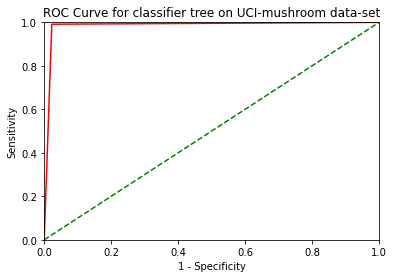

In [7]:
#Disclamer used sci-kit learn to generate roc curve as my implementation of tree does not have a pred_proba() function
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import tree

sci_tc = tree.DecisionTreeClassifier()
sci_tc.fit(X_train, y_train)
y_scores = sci_tc.predict_proba(X_test)
sensitivity, true_positive_rate, th = roc_curve(y_test, y_scores[:, 1])
AUC = auc(sensitivity, true_positive_rate)
print("AUC =", AUC)

plt.plot(sensitivity, true_positive_rate, 'r')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylabel('Sensitivity')
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.title('ROC Curve for classifier tree on UCI-mushroom data-set')
plt.show()